# Exercises

For all of the datasets below, examine the data types of each column, ensure that the dates are in the proper format, and set the dataframe's index to the date column as appropriate.

## Temps Dataset

Use the sf_temps dataset for the exercises below:

1. Resample by the day and take the average temperature. Visualize the average temperature over time.
2. Write the code necessary to visualize the minimum temperature over time.
3. Write the code necessary to visualize the maximum temperature over time.
4. Which month is the coldest, on average?
5. Which month has the highest average temperature?
6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from vega_datasets import data
temps = data.sf_temps()

In [3]:
temps.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [4]:
temps.dtypes

temp           float64
date    datetime64[ns]
dtype: object

In [5]:
temps.date = pd.to_datetime(temps.date)

In [6]:
temps = temps.set_index('date')

In [7]:
temps.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


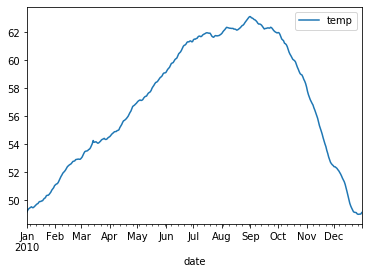

In [8]:
temps.resample('D').mean().plot()

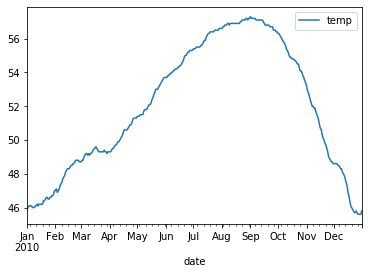

In [9]:
temps.resample('D').min().plot()

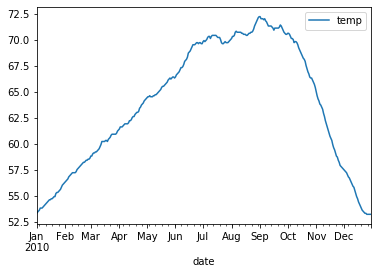

In [10]:
temps.resample('D').max().plot()

In [11]:
temps.resample('M').mean().idxmin()

temp   2010-01-31
dtype: datetime64[ns]

In [12]:
temps.resample('M').mean().idxmax()

temp   2010-09-30
dtype: datetime64[ns]

In [13]:
daily_min_max = temps.resample('D').agg(['min', 'max'])
daily_min_max['temp_change'] = daily_min_max.temp['max'] - daily_min_max.temp['min']
daily_min_max.resample('M').mean().temp_change.idxmax()

Timestamp('2010-09-30 00:00:00', freq='M')

## Seattle Weather Dataset

Use the seattle_weather dataset to answer the following questions:

1. Which year and month combination has the highest amount of precipitation?
2. Visualize the amount of monthly precipitation over time.
3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.
4. Which year-month combination is the windiest?
5. What's the sunniest year? (Hint: which year has the highest number of days where weather == sun?)
6. In which month does it rain the most?
7. Which month has the most number of days with a non-zero amount of precipitation?

In [39]:
from vega_datasets import data
df = data.seattle_weather()

In [40]:
df = df.set_index('date')

Month and year of where highest precipitation occurred

In [65]:
df.precipitation.resample("M").sum().sort_values(ascending=False).head(1)

date
2015-12-31    284.5
Name: precipitation, dtype: float64

In [41]:
print(df.precipitation.resample("M").sum().idxmax().month)
print(df.precipitation.resample('M').sum().idxmax().year)

12
2015


Monthly precipitation over time

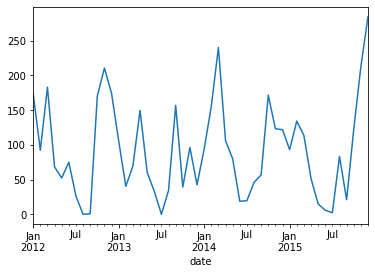

In [42]:
df.precipitation.resample('M').sum().plot()

Amount of wind over time

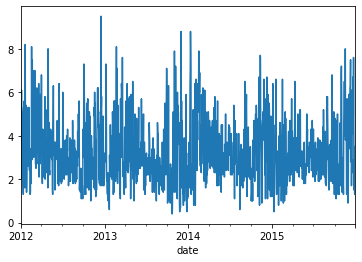

In [43]:
df.wind.resample('D').sum().plot()

Windiest year-month combination

In [44]:
print(df.wind.resample("M").sum().idxmax().month)
print(df.wind.resample('M').sum().idxmax().year)

12
2015


Sunniest year

In [52]:
df['sunny'] = df.weather == 'sun'
df.sunny.resample('Y').sum().idxmax().year

2014

Month with the most rain

In [58]:
df['rain'] = df.weather == 'rain'
df.rain.resample('M').sum().idxmax()

Timestamp('2012-11-30 00:00:00', freq='M')

Month with most days with non-zero amount of precipitation

In [71]:
df['rained'] = df.precipitation != 0
df.rained.resample('M').sum().idxmax()

Timestamp('2012-12-31 00:00:00', freq='M')

## Flights Data

1. Convert any negative delays to 0.
2. Which hour of the day has the highest average delay?
3. Does the day of the week make a difference in the delay amount?
4. Does the month make a difference in the delay amount?

In [72]:
df = data.flights_20k()

In [75]:
df = df.set_index('date')

In [84]:
df.delay[df.delay < 0]

date
2001-01-31 16:40:00    -5
2001-01-10 21:00:00   -15
2001-03-30 21:45:00    -2
2001-01-27 07:00:00   -13
2001-01-02 11:40:00    -1
2001-03-07 21:15:00    -3
2001-02-11 17:00:00    -6
2001-02-26 06:50:00    -2
2001-03-20 09:50:00   -12
2001-03-22 13:20:00    -6
2001-03-29 21:55:00    -7
2001-03-16 07:30:00   -11
2001-03-13 17:30:00   -10
2001-03-14 18:12:00    -2
2001-03-12 17:25:00    -4
2001-01-30 18:35:00    -7
2001-02-07 11:30:00    -5
2001-01-07 08:40:00    -8
2001-03-25 12:40:00    -8
2001-03-27 14:55:00    -3
2001-03-13 18:30:00    -9
2001-01-15 11:00:00    -7
2001-01-14 07:00:00   -14
2001-01-30 07:20:00   -10
2001-01-15 10:05:00   -10
2001-03-24 12:00:00    -2
2001-01-31 07:10:00    -2
2001-03-10 18:25:00   -22
2001-01-09 16:45:00    -5
2001-03-10 13:50:00   -10
                       ..
2001-03-03 11:25:00    -3
2001-02-04 16:35:00    -5
2001-03-01 07:20:00   -10
2001-01-05 10:00:00    -2
2001-02-22 06:25:00    -2
2001-01-29 09:10:00   -13
2001-02-24 07:05:00    -9
2001-03

In [76]:
df.head()

,delay,destination,distance,origin
date,,,,
2001-01-13 14:56:00,32,SJC,417,SAN
2001-01-31 16:40:00,-5,ISP,1093,FLL
2001-02-11 18:39:00,3,DAL,293,LBB
2001-01-10 21:00:00,-15,MCO,550,MSY
2001-03-30 21:45:00,-2,IND,229,STL


1. For each row, calculate the percentage of the year's total that energy source provided.
2. Lineplot of generation over time, color by source
3. Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)
4. Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?
5. Is the total generation increasing over time?
6. How would you control for increasing consumption over time when considering how much energy is coming from each source?
7. express each number as a % of the year's total

## Iowa Electricity Data

In [ ]:
from vega_datasets import data
data.iowa_electricity()

Use the sf_temps dataset
1. Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)
2. How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.
3. Create pretty labels for time plots
4. Visualize the number of days of each month that fall into each bin by year (e.g. x=month, y=n_days, hue=temp_bin) or st similar

In [ ]:
from vega_datasets import data
# data.sf_temps()

Not sure what this bird strikes data is for

In [ ]:
df = data.birdstrikes()